### **Contents**

0. Initial Setup
1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

****

### `Initial Setup`

In [45]:
# Import library eksplorasi dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import library modeling


import warnings
warnings.filterwarnings('ignore')

### `Business Problem Understanding`

#### **Problem Statement**

##### **Stakeholder** 
   - Bank's Marketing Manager 
   - Bank's Marketing Team.

##### **Problem**
   
   Permasalahan dari analisis ini terkait deposito nasabah. Deposito merupakan salah satu produk dari bank di mana nasabah akan menyimpan uangnya di bank, namun untuk mencairkannya harus sesuai dengan jangka waktu yang telah ditentukan di awal. Sebagai konsekuensinya, nasabah akan mendapatkan bunga yang dilihat dari total uang yang didepositokan

   Sebagai lembaga keuangan, bank tidak boleh kehilangan nasabah deposito karena dapat mengurangi aset pada bank. Selain itu, bank juga harus mencari nasabah lain untuk membuka rekening deposito. Ketika jumlah saldo deposito meningkat, maka meningkatkan juga nominal pinjaman yang dapat diberikan kepada nasabah. Dan bank akan mendapatkan keuntungan dari bunga pinjaman tersebut. Sehingga dapat dikatakan ketika saldo deposito meningkat juga dapat meningkatkan keuntungan dari bank. Dari analisis ini, pihak bank akan mencari kategori kandidat calon nasabah yang diprediksi ingin membuka rekening deposito. 


**Goals**

Dilihat dari permasalahannya, pihak bank ingin mencari kategori kandidat calon nasabah yang ingin melakukan deposito. Sehingga marketing yang akan dilakukan dapat fokus terhadap calon nasabah yang potensial (nasabah yang ingin membuka rekening deposito) untuk membuka deposito. 

Untuk itu, pihak bank ingin mengetahui faktor-faktor/variabel apa saja yang dimiliki atau mempengaruhi seseorang agar ingin membuka rekening deposito atau tidak. Sehingga, pihak bank bisa mendekati kategori nasabah yang sesuai untuk membuka rekening deposito. 

**Analytic Approach**

Kita akan menganalisis data untuk mencari pola yang bisa membedakan kategori nasabah yang ingin membuka deposito atau tidak.

Selannjutnya, kita akan membangun model klasifikasi yang akan membantu pihak bank untuk memprediksi probabilitas nasabah ingin membuka rekening deposito atau tidak. 

**Metric Evaluation**

Target dari analisis dapat kita kategorikan:

0 : no (tidak ingin membuka rekening deposito)
<br>
1 : yes (ingin membuka rekening deposito)

**Type I Eror | False Positif**

Kondisi di mana nasabah terprediksi ingin membuka rekening deposito padahal kenyataannya tidak ingin membuka rekening deposito
**Konsekuensi** : Marketing yang dilakukan bank akan cenderung sia-sia karena tidak tepat sasaran

**Type II Eror | False Negatif**

Kondisi di mana nasabah terprediksi tidak ingin membuka rekening deposito padahal kenyataanya ingin membuka rekening deposito
**Konsekuensi** : Bank akan kehilangan keuntungan yang didapatkan dari nasabah potensial (Nasabah yang ingin membuka rekening deposito)


Sebagai gambaran dari konsekuensinya, maka kita akan mencoba menghitung dampak biaya dari asumsi tersebut:

- Jumlah orang yang tidak membuka rekening deposito 4081 orang *(sumber dari database)*
- Jumlah orang yang membuka rekenning deposito 3732 *(sumber dari database)*
- Biaya marketing untuk deposito rata-rata dari Bank adalah 1% dari gross revenue [sumber](https://emiboston.com/leading-u-s-banks-boosted-marketing-spend-in-2022/)
- Minimal untuk pembukaan rekening deposito per orang sekitar $1,000 [sumber](https://www.forbes.com/advisor/banking/bank-account-minimum-deposit-minimum-balance-requirements/)
- rata-rata bunga deposito 5.77% [sumber](https://www.theglobaleconomy.com/rankings/deposit_interest_rate/)
- rata-rata bunga pinjaman 10.42% [sumber](https://www.theglobaleconomy.com/rankings/lending_interest_rate/#:~:text=Lending%20interest%20rate%20%2D%20Country%20rankings&text=The%20average%20for%202020%20based,was%20in%20Hungary%3A%201.96%20percent.)
- Gross revenue adalah 3732 x $1,000 = $3,732,000
- Biaya marketing adalah 1% dari $3,732,000 sehingga menghasilkan $37,320

***Untuk Type I Eror*** :

CPM *(Cost Per Marketing)* adalah perhitungan biaya marketing oleh bank per satu nasabah yang diukur dari 

$$ CPM =  \frac {Biaya\ Marketing}{Jumlah\ Total\ Nasabah} $$

Sehingga bisa dikatakan dari CPM bisa dikatakan Bank akan mengeluarkan biaya marketing per nasabah $4.77 . Dan dari database berarti pihak bank mengeluarkan $4.77 X 4081 (nasabah yang tidak membuka rekening deposito) = $19.466,37 biaya marketing yang sia-sia.

***Untuk Type II Eror***

Pihak bank akan mendapatkan keuntungan dari nominal pinjaman yang diberikan, nominal pinjaman yang diberikan dilihat dari aset yang salah satunya didapatkan dari bertambahnya deposito.

$$ Profit\ per\ nasabah = {(Bunga\ Pinjaman\ -\ Bunga\ Deposito)\ X\ Minimum\ Pembukaan\ Deposito } $$

Sehingga keuntungan yang diperoleh dari setiap nasabah deposito adalah $46.5
Dan bank telah kehilangan potensi untuk mendapatkan profit sebesar $46.5 x 4081 (nasabah yang tidak membuka rekening deposito) yaitu $189.766,5 .

Setelah mempertimbangkan hal-hal diatas, kami merasa bahwa type I eror dan type II eror sama pentingnya untuk diminimalisir, sehingga sebisa mungkin yang akan kita lakukan adalah membuat model yang dapat memprediksi sebanyak mungkin ***kelas positif*** dan ***kelas negatif*** yang benar dan meminimalkan type I error dan type II error. Jadi, metric yang akan digunakan untuk analisis adalah `MCC (Matthew Correlation Coefficient)`.


### `Data Understanding`

| Columns                                            | Definition                                                   | 
| ------------------------------------------------- | ------------------------------------------------------------ |
| age | the age of the customer |
| job | the jog of the customer |
| balance | amount of money in a financial repository, such as a savings or checking account |
| housing | Is the customers has housing loan |
| loan | Is the customers has loan |
| contact | Contact communication type |
| month | Last contact month of the year |
| campaign | Number of contacts performed during this campaign and for this client |
| pdays | Number of days after the client was contacted from the previous campaign (numeric; -1 means client was not previously contacted) |
| poutcome | Outcome of the previous marketing campaign |
| deposit | Whether the customer deposits or not |

In [46]:
data = pd.read_csv(r'C:\Users\user\Documents\database purwadhika\Capstone_project 3\data\raw\data_bank_marketing_campaign.csv')
print(f'Jumlah baris dan kolom: {data.shape}')

data.sample(5)

Jumlah baris dan kolom: (7813, 11)


,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
6855,29,technician,344,yes,yes,unknown,may,2,-1,unknown,no
4787,56,management,2333,no,no,cellular,may,1,-1,unknown,yes
4348,57,blue-collar,2058,yes,no,telephone,may,2,-1,unknown,no
2185,56,admin.,1854,yes,no,telephone,may,1,342,failure,no
164,28,management,0,yes,no,cellular,jul,5,-1,unknown,yes


#### **Initial Assesment**

In [47]:
pd.DataFrame({
    'column': data.columns.values,
    'type': data.dtypes.values,
    'n_unique': data.nunique().values,
    'min': data.min().values,
    'max': data.max().values,
    'sample_unique': [data[col].unique() for col in data.columns]
})

,column,type,n_unique,min,max,sample_unique
0,age,int64,75,18,95,"[55, 39, 51, 38, 36, 41, 37, 35, 57, 23, 33, 3..."
1,job,object,12,admin.,unknown,"[admin., self-employed, services, housemaid, t..."
2,balance,int64,3153,-6847,66653,"[1662, -3058, 3025, -87, 205, -76, 4803, 911, ..."
3,housing,object,2,no,yes,"[no, yes]"
4,loan,object,2,no,yes,"[no, yes]"
5,contact,object,3,cellular,unknown,"[cellular, telephone, unknown]"
6,month,object,12,apr,sep,"[jun, apr, may, nov, jan, sep, feb, mar, aug, ..."
7,campaign,int64,32,1,63,"[2, 3, 1, 4, 5, 6, 7, 30, 8, 9, 11, 14, 10, 28..."
8,pdays,int64,422,-1,854,"[-1, 352, 21, 91, 186, 263, 96, 355, 294, 412,..."
9,poutcome,object,4,failure,unknown,"[unknown, other, failure, success]"


__Insight :__
* ....
* ....
* ....
* ....

#### **Numerical variable**

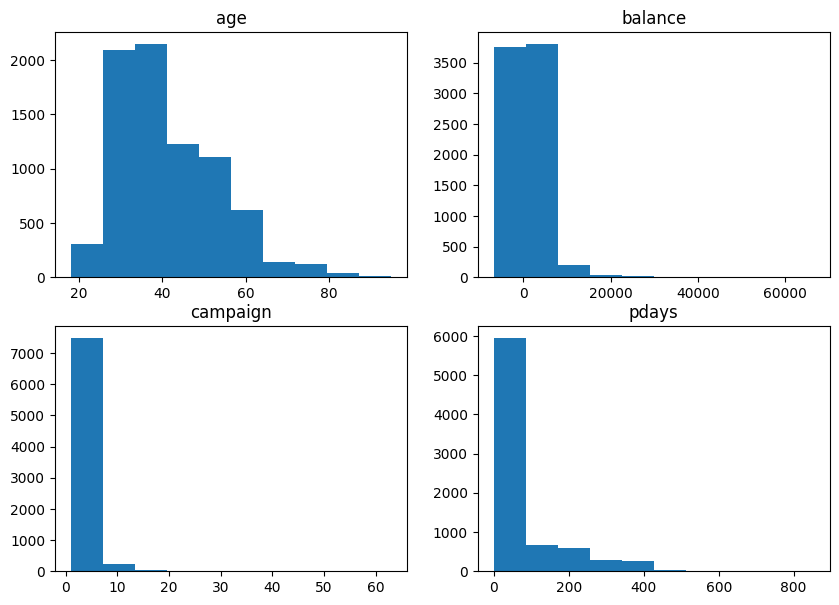

In [48]:
num_columns = ['age','balance','campaign', 'pdays',]

fig, axs = plt.subplots(2, 2, sharex=False, sharey=False, figsize=(10, 7))

counter = 0
for num_column in num_columns:
    
    trace_x = counter // 2
    trace_y = counter % 2
    
    axs[trace_x, trace_y].hist(data[num_column])
    
    axs[trace_x, trace_y].set_title(num_column)
    
    counter += 1

plt.show()

 - continou = age, balance
 - discrete = campaign, pdays


__Insight :__
* ...
* ...
* ...

#### **Categorical variable**

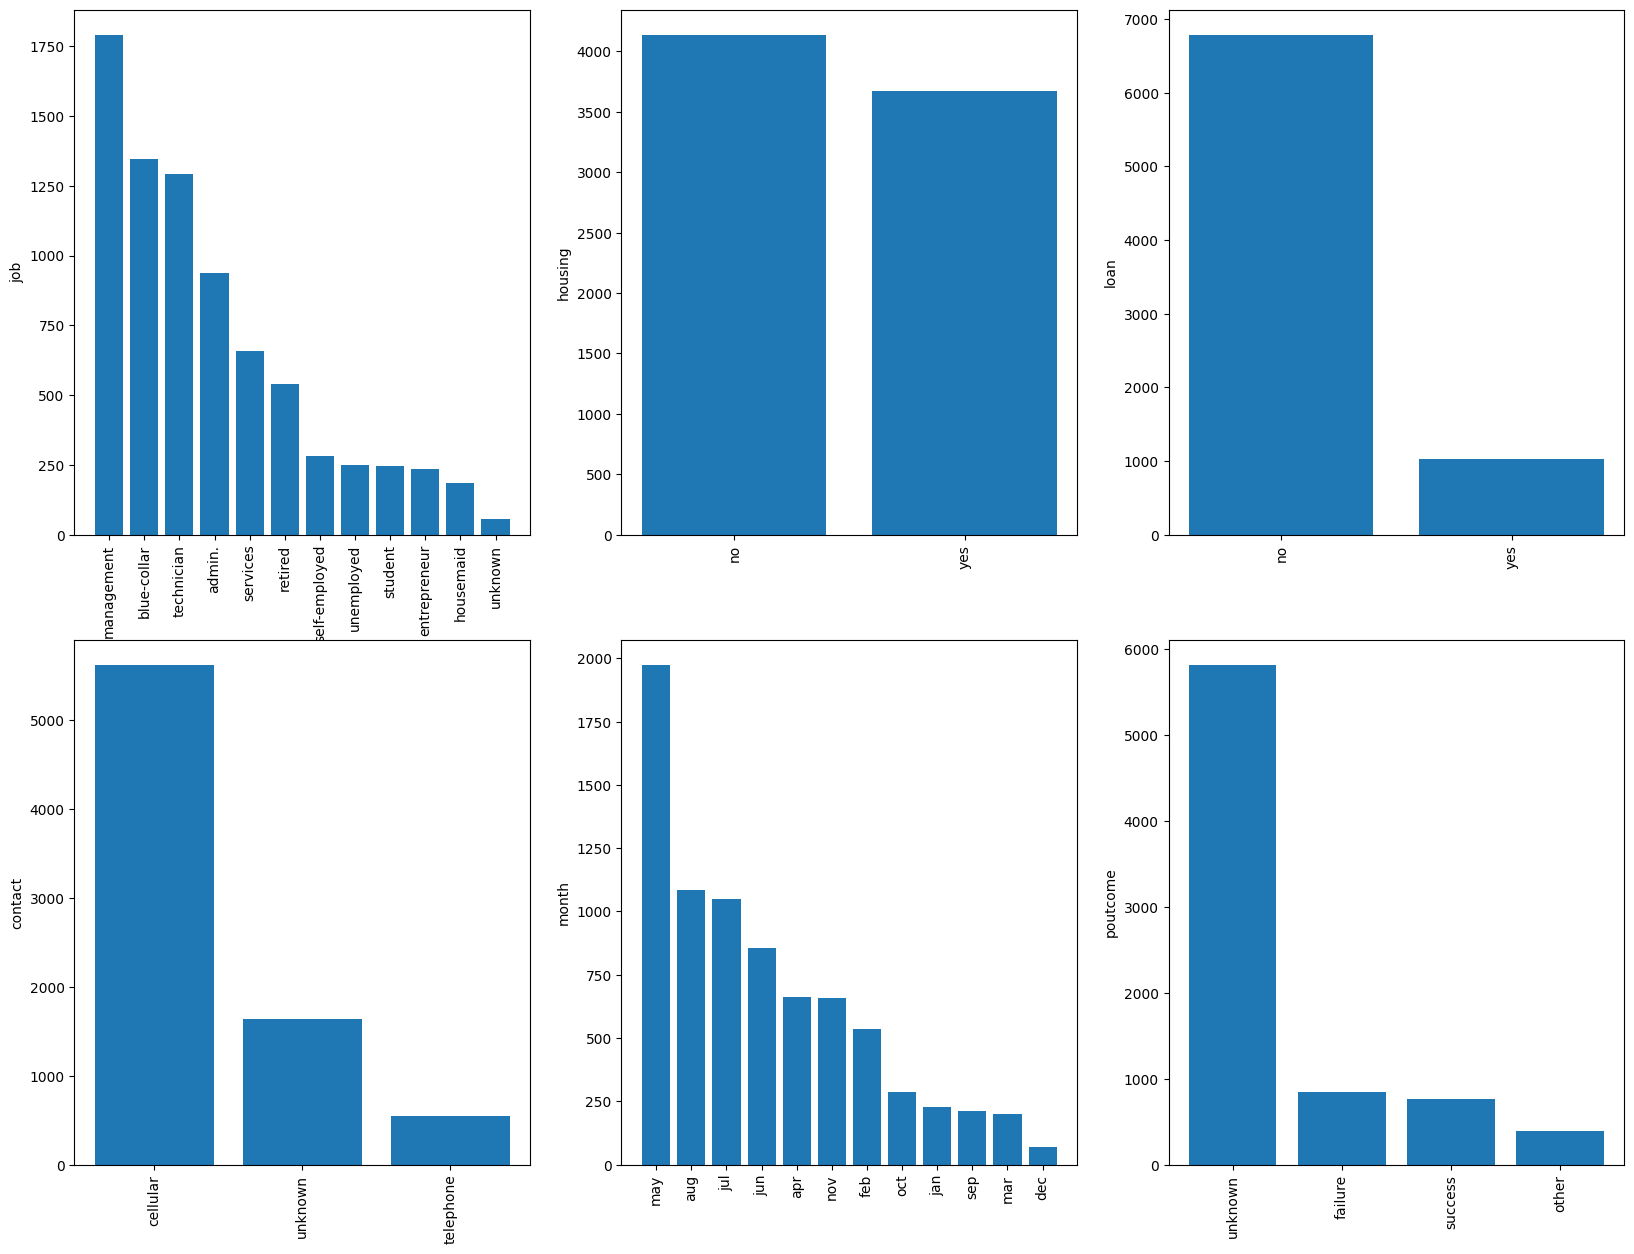

In [49]:
cat_columns = ['job', 'housing', 'loan', 'contact', 'month','poutcome']

fig, axs = plt.subplots(2, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for cat_column in cat_columns:
    value_counts = data[cat_column].value_counts()
    
    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))
    
    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)
    
    axs[trace_x, trace_y].set_ylabel(cat_column)
    
    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)
    
    counter += 1
plt.show()

- ordinal = month
- nominal = job, housing, loan, contact, poutcome, deposit

__Insight :__
* ...
* ...
* ...

### `Data Preparation`

In [50]:
df = data.copy()
df.sample(5)

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
1269,36,admin.,1207,yes,no,cellular,nov,2,-1,unknown,yes
1710,36,services,4721,no,no,cellular,mar,2,90,success,yes
4850,33,technician,1234,no,no,telephone,nov,1,-1,unknown,no
1951,34,blue-collar,1156,yes,no,unknown,may,2,-1,unknown,no
4940,42,technician,13410,no,yes,cellular,aug,2,-1,unknown,no


#### **Data Wrangling**

**Missing Value**

Deteksi dan kuantifikasi missing value:

In [51]:
df.isna().sum()

age         0
job         0
balance     0
housing     0
loan        0
contact     0
month       0
campaign    0
pdays       0
poutcome    0
deposit     0
dtype: int64

Handling missing value:

__Insight :__ 
* ....
* ....
* ....

**Rare label**

Deteksi dan kuantifikasi rare value:

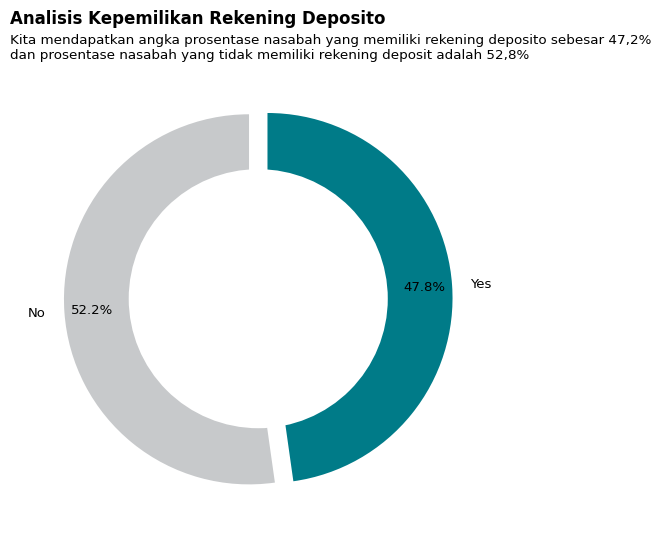

In [52]:
# calculate the customers that have accepted campaign once or more and the customers that never accepted
value_dep = df['deposit'].value_counts()

# initialize plot
fig, ax = plt.subplots(figsize=(5, 5))

# adjust the subplot so that the title would fit
plt.subplots_adjust(top=0.9)

# add title
fig.text(
    0, 1.05, "Analisis Kepemilikan Rekening Deposito", 
    fontsize=12,
    fontweight="bold", 
)

# add subtitle
fig.text(
    0, 0.98, 
    f'''Kita mendapatkan angka prosentase nasabah yang memiliki rekening deposito sebesar 47,2%
dan prosentase nasabah yang tidak memiliki rekening deposit adalah 52,8%''',
    fontsize=9.7, 
    color='black'
)

# create pie chart
plt.pie(value_dep, 
        colors=["#C7C9CB", '#007b88'],
        labels=['No', 'Yes' ], 
        autopct='%1.1f%%', 
        startangle=90, 
        pctdistance=0.85, 
        explode=(0.05, 0.05),
        textprops = {"fontsize": 9.5},
)

# create a circle at the center of the plot
fig = plt.gcf()
fig.gca().add_artist(plt.Circle((0, 0), 0.7, fc='white'))

# show
plt.tight_layout()
plt.show()

__Insight :__ 
* Data nasabah yang membuka rekening deposito ada 3732 orang dengan prosentase 47,8% 
* Data nasabah yang tidak membuka rekening deposito ada 4081 orang dengan prosentase 52,2% 
* Target data bisa dikatakan balance karena prosentase yang membuka deposito dan tidak hampir sama

**Outlier** 

Deteksi dan kuantifikasi outlier:

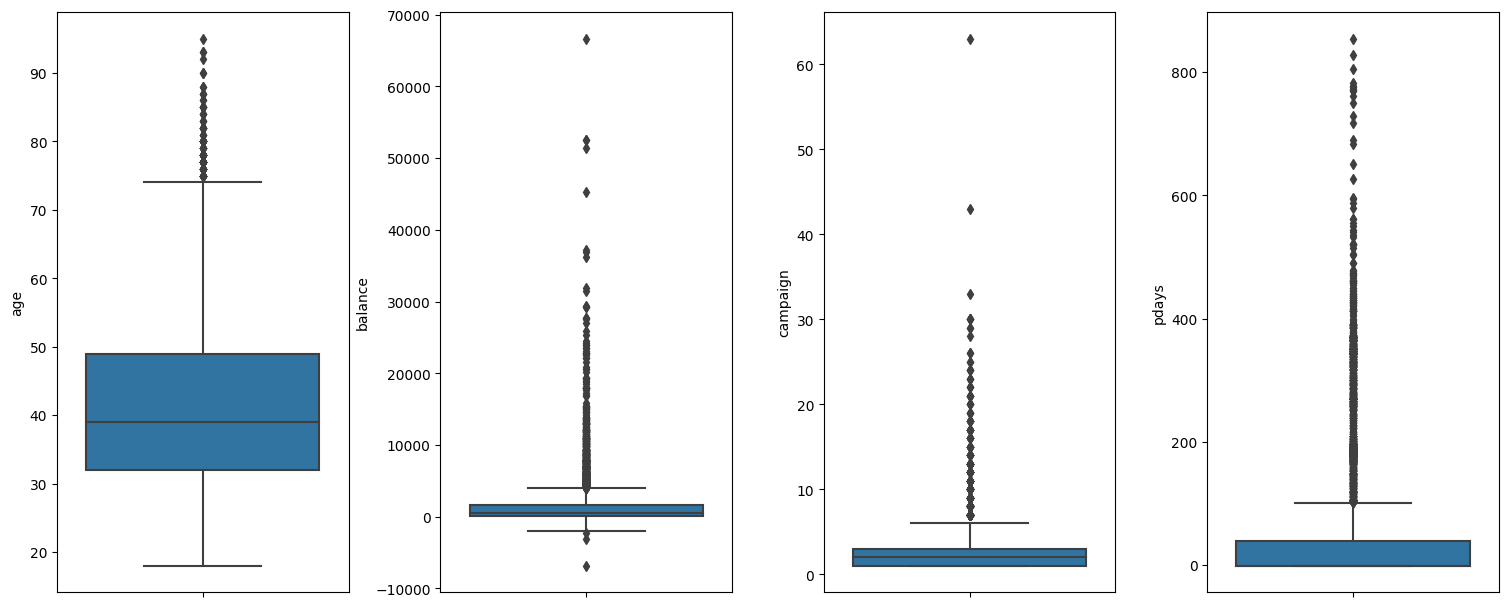

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

dataout = df[['age', 'balance', 'campaign', 'pdays']]

fig, axs = plt.subplots(ncols=4, nrows=1, figsize=(15, 6))
index = 0
axs = axs.flatten()
for k,v in dataout.items():
    sns.boxplot(y=k, data=dataout, ax=axs[index])
    index += 1

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Handling outlier:

__Insight :__
* ....
* ....
* ....

**Problematic Data Value**

Deteksi dan kuantifikasi data problematik pada kolom pdays :

In [54]:
df[df['pdays'] == -1]

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no
5,41,admin.,-76,yes,no,cellular,apr,1,-1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
7807,33,management,0,yes,yes,cellular,may,2,-1,unknown,no
7808,62,housemaid,2,no,no,cellular,nov,1,-1,unknown,yes
7810,36,unknown,179,no,no,cellular,aug,8,-1,unknown,no
7811,31,admin.,54,yes,no,cellular,nov,1,-1,unknown,no


__Insight :__
* Terdapat data dengan value minus (-) yaitu -1 yang memiliki arti nasabah tersebut tidak pernah dihubungi dilihat dari campaign terakhir sejumlah 5817 data
* Handling problematik data akan dilakukan pada pycaret dengan mengganti -1 menjadi 0 

Deteksi dan kuantifikasi data problematik pada kolom job :

In [68]:
df[df['job'] == 'unknown']

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
103,45,unknown,356,no,no,cellular,aug,2,-1,unknown,no
110,41,unknown,1567,no,no,cellular,jul,2,-1,unknown,no
330,48,unknown,3,no,no,cellular,aug,2,-1,unknown,no
900,60,unknown,17297,no,no,cellular,aug,11,-1,unknown,yes
979,57,unknown,19268,no,no,unknown,oct,1,-1,unknown,yes
1037,58,unknown,1547,no,no,telephone,aug,4,-1,unknown,yes
1071,48,unknown,558,no,no,cellular,aug,6,-1,unknown,no
1077,55,unknown,2206,no,no,cellular,aug,1,91,success,yes
1140,53,unknown,549,no,no,telephone,jan,2,-1,unknown,no
1228,26,unknown,3247,no,no,telephone,feb,3,-1,unknown,no


__Insight :__
* Terdapat data dengan value unknown sejumlah 54 data
* Handling problematik data akan dilakukan pada pycaret dengan mengganti unknown menjadi other sehingga ketika nantinya data baru yang akan dimasukkan dan bervalue unknown atau tidak terdapat dari 11 kategori yang tersedia dapat dimasukkan dalam other 

Deteksi dan kuantifikasi data problematik pada kolom poutcome :

In [70]:
df[df['poutcome'] == 'unknown']

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no
5,41,admin.,-76,yes,no,cellular,apr,1,-1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
7799,33,management,0,yes,yes,cellular,may,2,-1,unknown,no
7800,62,housemaid,2,no,no,cellular,nov,1,-1,unknown,yes
7802,36,unknown,179,no,no,cellular,aug,8,-1,unknown,no
7803,31,admin.,54,yes,no,cellular,nov,1,-1,unknown,no


__Insight :__
* Terdapat data dengan value unknown sejumlah 11 data
* Handling problematik data akan dilakukan pada pycaret dengan mengganti unknown menjadi other untuk menyederhanakan karena kategori other juga sudah tersedia sebelumnya 

In [69]:
len(df[df['job'] == 'unknown'])

54

**Duplicated Value**

Deteksi dan kuantifikasi data duplikat :

In [55]:
df[df.duplicated()]

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
2944,40,blue-collar,0,yes,no,unknown,may,2,-1,unknown,no
4368,60,management,0,no,no,cellular,aug,3,-1,unknown,yes
4874,41,management,0,no,no,cellular,aug,2,-1,unknown,no
5326,44,blue-collar,0,yes,no,cellular,jul,1,-1,unknown,no
5609,39,technician,0,yes,no,unknown,may,1,-1,unknown,no
5681,38,technician,0,no,no,cellular,aug,2,-1,unknown,no
5905,34,management,0,no,no,cellular,aug,2,-1,unknown,no
7077,30,blue-collar,239,yes,no,unknown,may,1,-1,unknown,yes


Handling data duplikat :

In [56]:
df = df.drop_duplicates(keep='last', ignore_index=True)

#### **Feature Engineering**

Bagi dataset menjadi train set dan test set:

In [57]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.2, random_state=0)

X_train = df_train.drop(columns='deposit')
y_train = df_train['deposit']

X_test = df_test.drop(columns='deposit')
y_test = df_test['deposit']

df_train.shape, df_test.shape

((6244, 11), (1561, 11))

In [58]:
from sklearn.base import BaseEstimator, TransformerMixin

class clearAll(BaseEstimator, TransformerMixin):
    
    def _init_(self):
        pass

    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        # A = [[X[list(X.columns)].drop_duplicates(ignore_index= True, keep= 'first')]] #Drop duplikat n=8
        set(X[list(X.columns)]) #Drop duplikat n=8
        # A.fit_transform(X_train)
        return A

In [59]:
axxxxx = data.to_dict()

In [60]:
xa = [[axxxxx]]

In [61]:
xa

[[{'age': {0: 55,
    1: 39,
    2: 51,
    3: 38,
    4: 36,
    5: 41,
    6: 37,
    7: 36,
    8: 35,
    9: 57,
    10: 23,
    11: 33,
    12: 31,
    13: 53,
    14: 30,
    15: 38,
    16: 39,
    17: 30,
    18: 31,
    19: 46,
    20: 48,
    21: 57,
    22: 25,
    23: 35,
    24: 38,
    25: 29,
    26: 28,
    27: 52,
    28: 49,
    29: 44,
    30: 31,
    31: 28,
    32: 33,
    33: 28,
    34: 42,
    35: 27,
    36: 47,
    37: 64,
    38: 37,
    39: 26,
    40: 25,
    41: 38,
    42: 34,
    43: 57,
    44: 56,
    45: 32,
    46: 32,
    47: 32,
    48: 33,
    49: 29,
    50: 33,
    51: 47,
    52: 58,
    53: 31,
    54: 45,
    55: 54,
    56: 32,
    57: 32,
    58: 44,
    59: 50,
    60: 45,
    61: 46,
    62: 44,
    63: 37,
    64: 57,
    65: 31,
    66: 37,
    67: 51,
    68: 79,
    69: 65,
    70: 56,
    71: 31,
    72: 26,
    73: 40,
    74: 35,
    75: 50,
    76: 36,
    77: 24,
    78: 58,
    79: 34,
    80: 39,
    81: 45,
    82: 35,
    83:

In [62]:
# # Membuat pipeline transformasi

# from sklearn.preprocessing import RobustScaler
# from pycaret.internal.preprocess.transformers import TransformerWrapper #Melakukan transformer

# customPipeline = [
#     ("clearAll", TransformerWrapper(transformer=clearAll())),
# ]

In [63]:
# # Setting parameter dasar menggunakan pycaret
# import pycaret
# from pycaret.classification import *

# clf = setup(
#     # general setup
#     data=df_train, 
#     target='deposit',
#     train_size=0.8,
#     verbose=False,
#     preprocess=False,

#     # feature setup
#     # ignore_features=[],

#     # experiment setup
#     session_id=42, 
#     log_data=True,
#     log_plots=True,

#     # data wrangling
#     imputation_type=None, 
#     # remove_outliers=True,
#     # outliers_method='iforest',
#     custom_pipeline=customPipeline,
#     custom_pipeline_position=0,
# )

In [64]:
# set_config(display= 'diagram')

In [65]:
# get_config("X_train_transformed").duplicated().value_counts()

Proses scaling dan encoding:

Feature Creation:

Feature Selection:

### `Modeling`

**Model Experiment**

Bandingkan model regresi atau klasifikasi untuk mendapatkan benchmark model:

Lakukan optimasi model benchmark:

Validasi silang 10-fold untuk mendapatkan rentang kinerja model:

**Model Intepretation**

* .....
* .....
* .....

**Model Limitation**

* .....
* .....
* .....


### `Conclusion`

Beberapa hal yang dapat disimpulkan yaitu:

* ....
* ....
* ....

### `Recommendations`

Hal yang dapat dilakukan untuk mengembangkan model agar lebih baik lagi, seperti:

* ....
* ....
* ....